# Standerd process of time series problem slove

1. Data ingestion
2. EDA of the data
3. processing of the data
4. model evalution


# Data ingestion

1. import the Required libraies:- import the reuired libraies such as pandas , numpy , matplotlib, seaborn etc
2. Load the data
3. Load the time series data into a pandas dataframe
3. check the datatype of the index and convert it to datetime if necessary
4. set the datetime columns as the index of the dataframe

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd

data = pd.read_csv('TSLA.csv')

In [9]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


# Type of time series analysis

1. univariate timeseries
2. multivariate timeseries

In [12]:
stock_data = data[['Date' , 'Close']]

In [13]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [15]:
# univariate time series analysis
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [17]:
stock_data.shape

(758, 2)

In [19]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [20]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [21]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [22]:
stock_data=stock_data.set_index('Date')

In [23]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


# Why we are converting data columns as a index column

1. i can easily retrive the data
2. visulizaation is also simple
3. those lib has been degine in such a way it required date column as a index (scipy statsmodel)

# EDA(Exploratory data analysis)

1. Summary statistics

    :- compute summary statistics such as mean, median, mode,standard deviation,to get an overview of the data
    
    
2. visualize the time series data

    :- plot the time series data
    
    :- plot the rolling mean and rolling standard deviation of the time series data
    
    :- Decompose the time series data check for anf trends, seasonality and noise
    
    :- plot the decomposed components to get a better understanding of the time series data
    
    
3. stationarity check

    :- check for stationarity
    
    :- check for stationarity of the time series data using the Augmented Dickey-Fuller test
    

4. Check for autocorrelation

    :- Plot the autocorrelation function (ACF) and partial autocorrelation(PACF) to identify the order of the ARIMA model
    

5. Outlier Detection

    :-  Detect and handle outliers using statistical method or machine learning techniques

In [25]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,758.0,485.531513,353.160353,35.793999,112.3235,488.125,762.142502,1229.910034


In [26]:
import numpy as np
import matplotlib.pyplot as plt


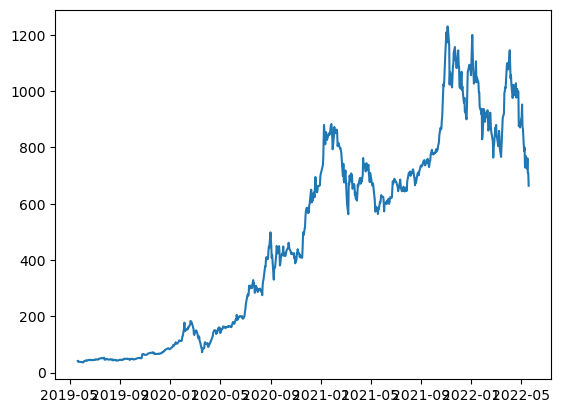

In [27]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

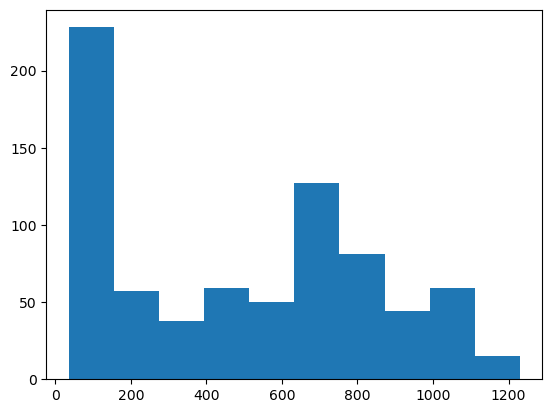

In [28]:
plt.hist(stock_data['Close'])

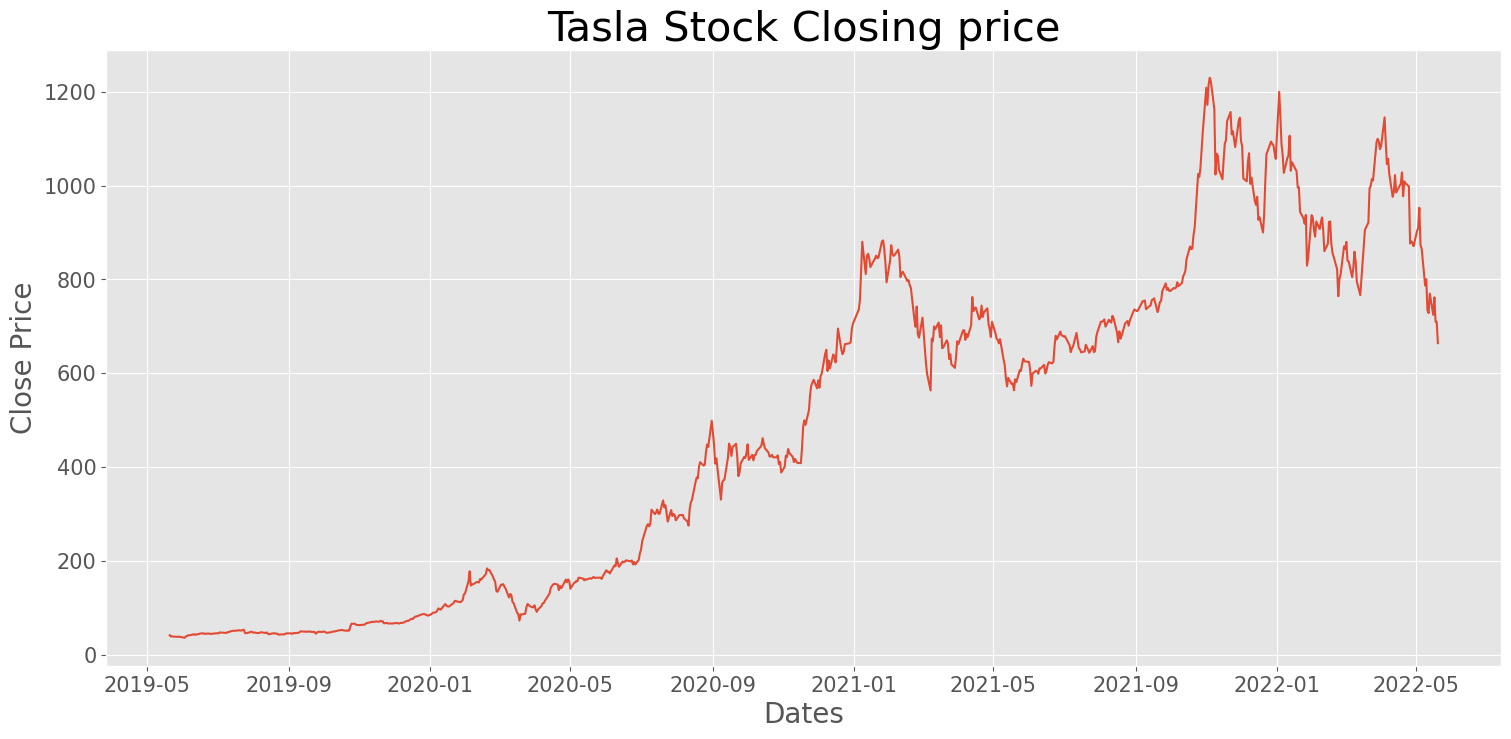

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price' , fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'])
plt.title('Tasla Stock Closing price' , fontsize=30)
plt.show()

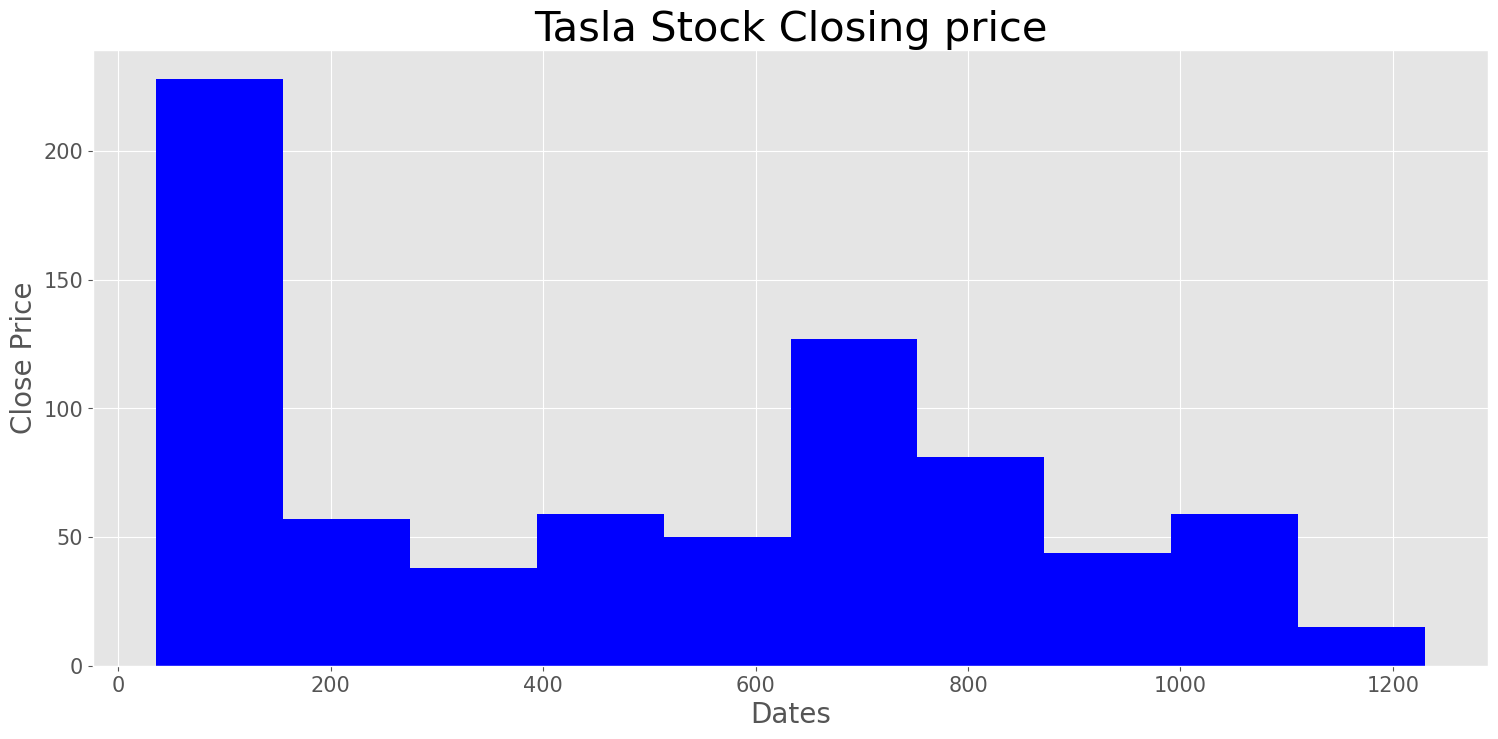

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price' , fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'] , linewidth=3 , color = 'blue')
plt.title('Tasla Stock Closing price' , fontsize=30)
plt.show()

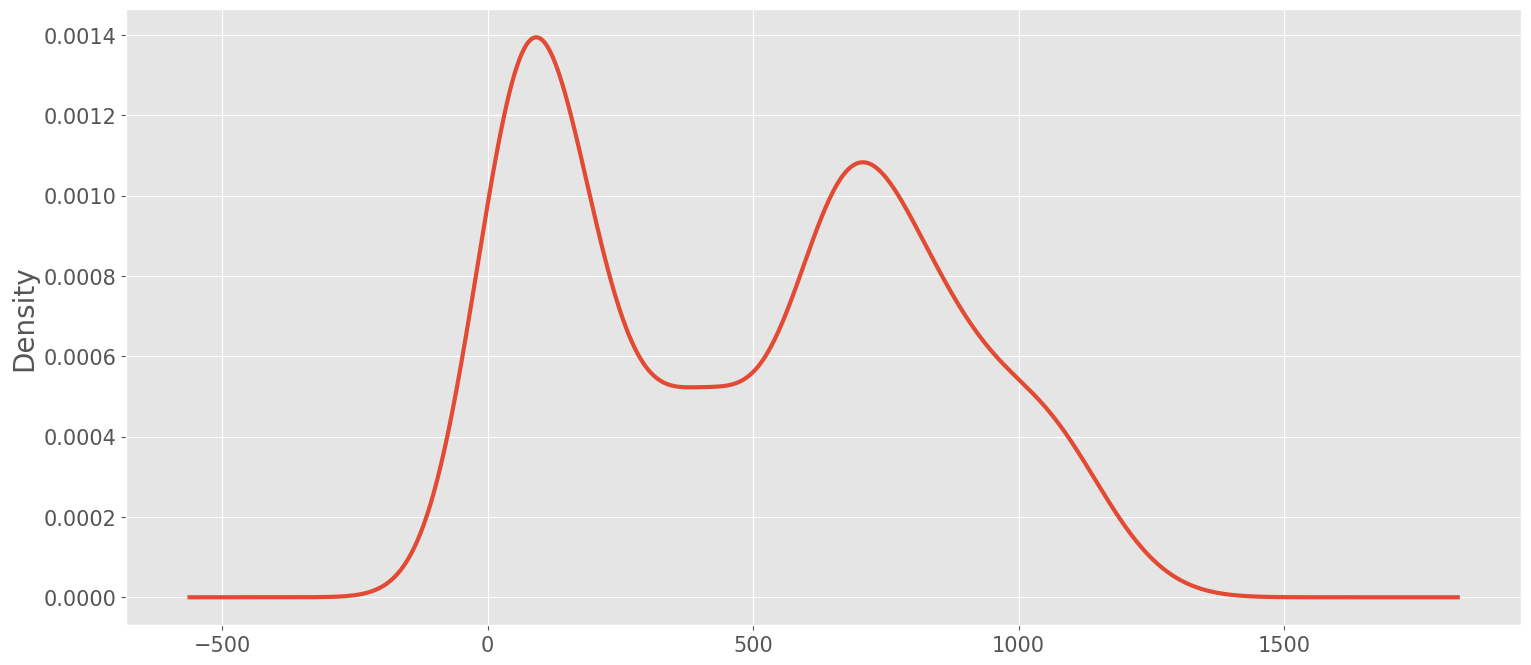

In [32]:
df_close = stock_data['Close']
df_close.plot(kind = 'kde', figsize = (18,8), linewidth =3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density' , fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [33]:
rolmean = stock_data['Close'].rolling(365).mean()

In [36]:
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    812.017943
2022-05-17    812.478847
2022-05-18    812.782327
2022-05-19    812.967697
2022-05-20    813.006108
Name: Close, Length: 758, dtype: float64

In [37]:
stock_data['Close'].rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

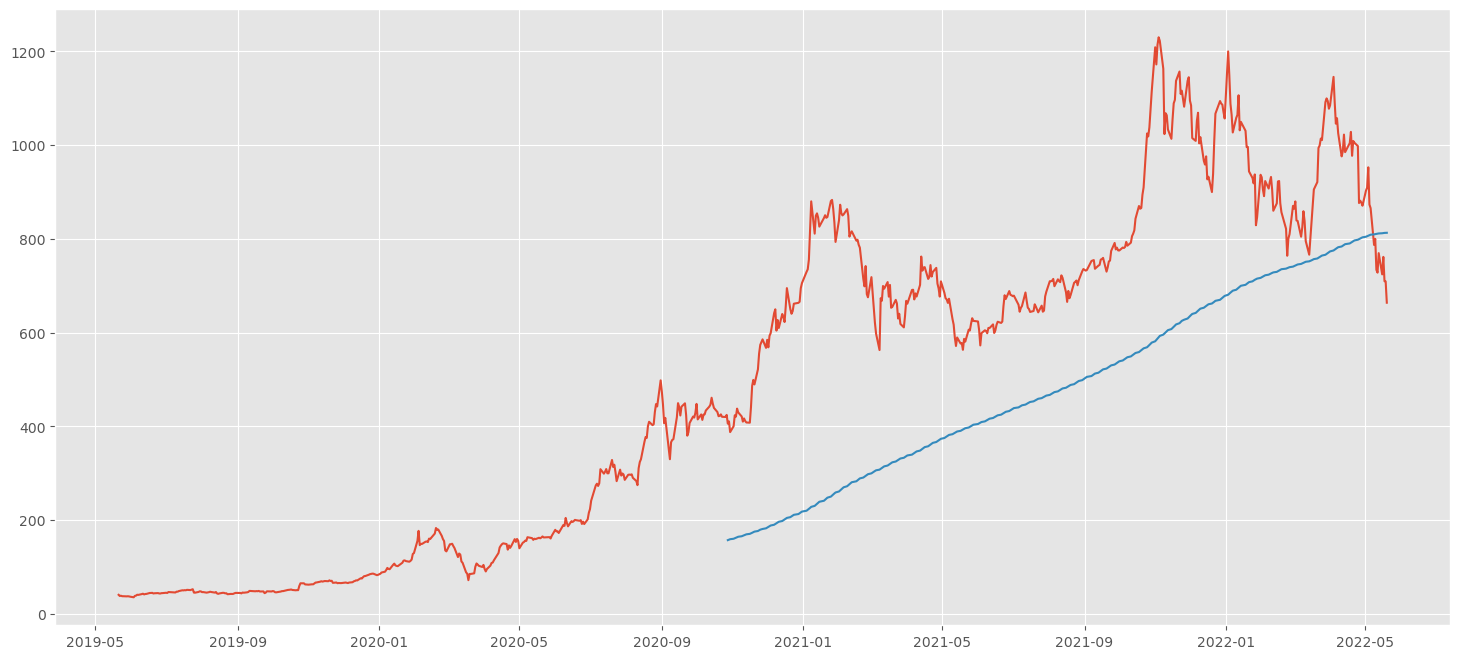

In [38]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
adft = adfuller(stock_data['Close'])

In [41]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [43]:
pd.Series(adft[0:4] , index = ['test stats' , 'p-value' ,'lag' , 'data point'])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [44]:
# test for staionarity

def test_stationarity(timeseries):
    # Daterming rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    
    # plot rolling statistics
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries,color = 'blue' , label = 'original' , linewidth = 3)
    plt.plot(rolmean , color = 'red' , label = 'Rolling Mean' , linewidth = 3)
    plt.plot(rolstd , color = 'black' , label = 'Rolling Std' , linewidth = 3)
    plt.legend(loc= 'best' , fontsize=20 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation' , fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block = False)
    
    print('Results of dickey fuller test')
    adft = adfuller(timeseries , autolag = 'AIC')
    
    # output for dft will give us without defining what the value are
    # hence we manually write what value does it explains using a for loop
    
    output = pd.Series(adft[0:4] , index=["Test Statistics" ,"p-value" , 'No. of legs used' , 'Number of observations used'])
    for key,values in adft[4].items():
        output['critical value(%s)'%key] = values
    print(output)

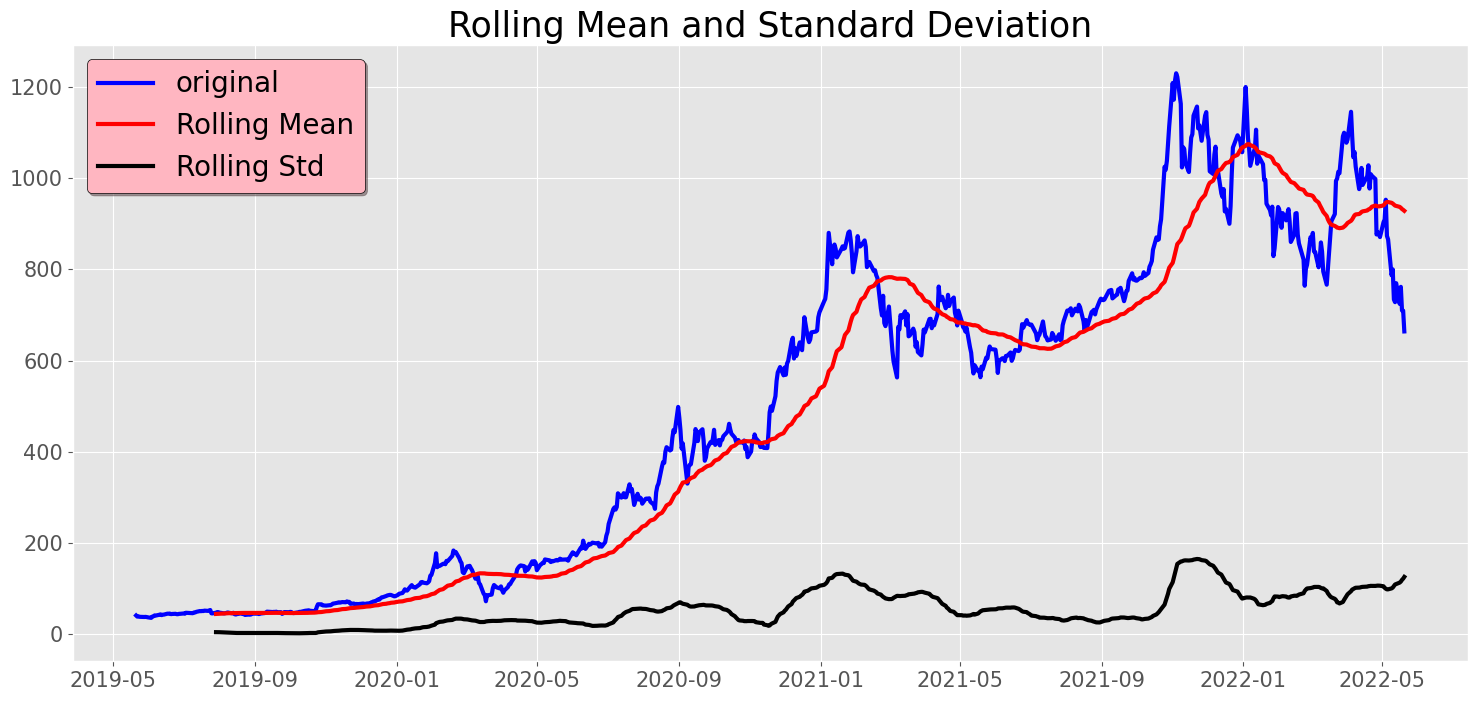

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of legs used                 9.000000
Number of observations used    748.000000
critical value(1%)              -3.439123
critical value(5%)              -2.865412
critical value(10%)             -2.568832
dtype: float64


In [45]:
test_stationarity(stock_data.Close)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data['Close'] , model = 'multiplicative' , period = 30)

In [47]:
result

<Figure size 2000x1000 with 0 Axes>

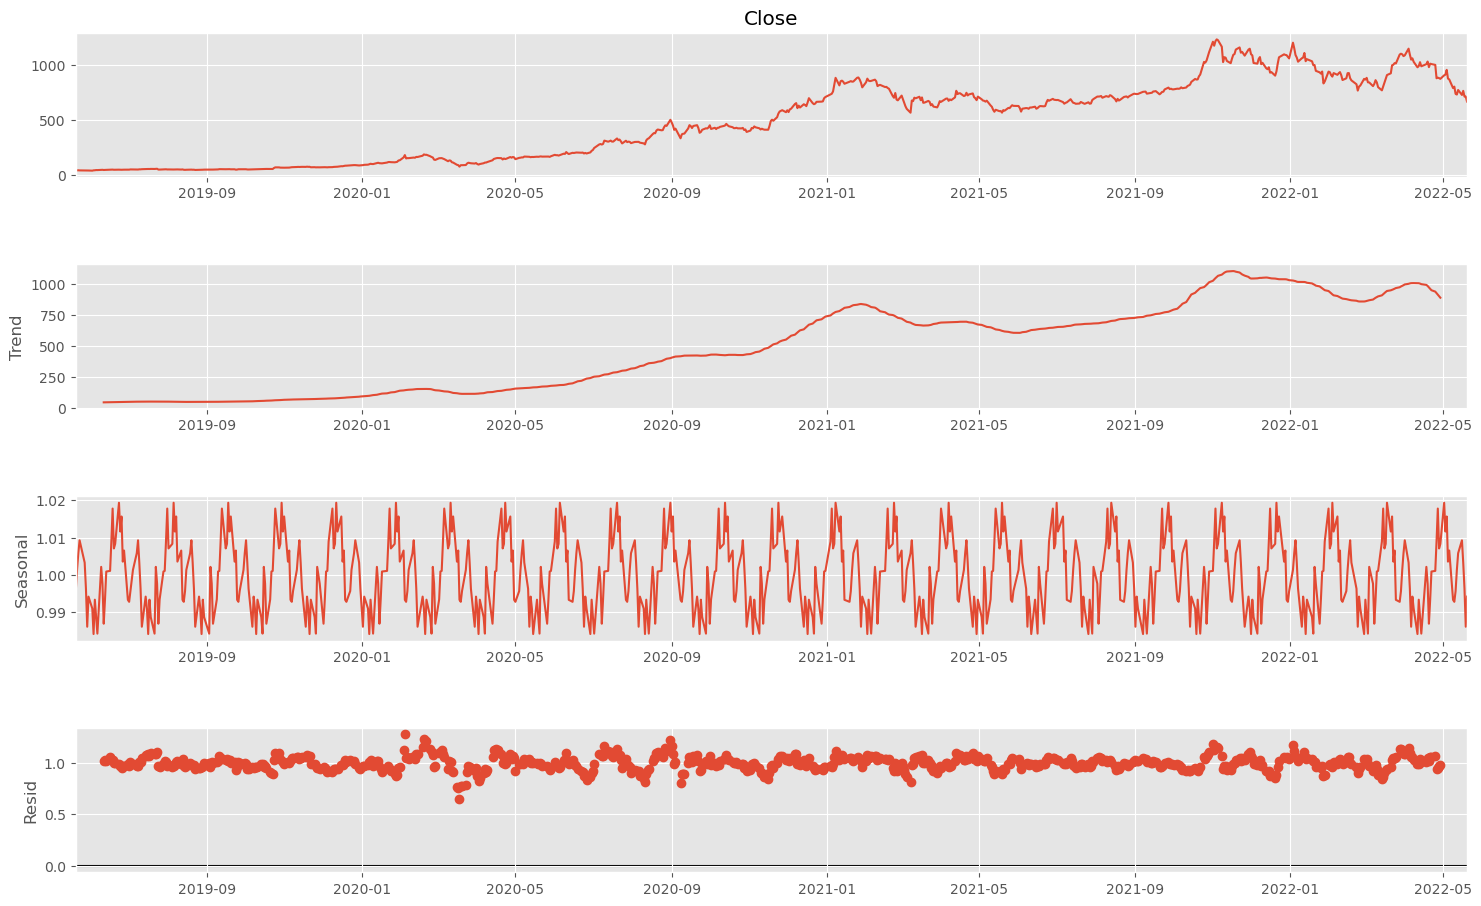

In [48]:
plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [49]:
result.seasonal

Date
2019-05-21    0.995645
2019-05-22    1.001321
2019-05-23    1.005804
2019-05-24    1.009275
2019-05-28    1.003281
                ...   
2022-05-16    1.009275
2022-05-17    1.003281
2022-05-18    0.996281
2022-05-19    0.986065
2022-05-20    0.994151
Name: seasonal, Length: 758, dtype: float64

In [50]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [52]:
result.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

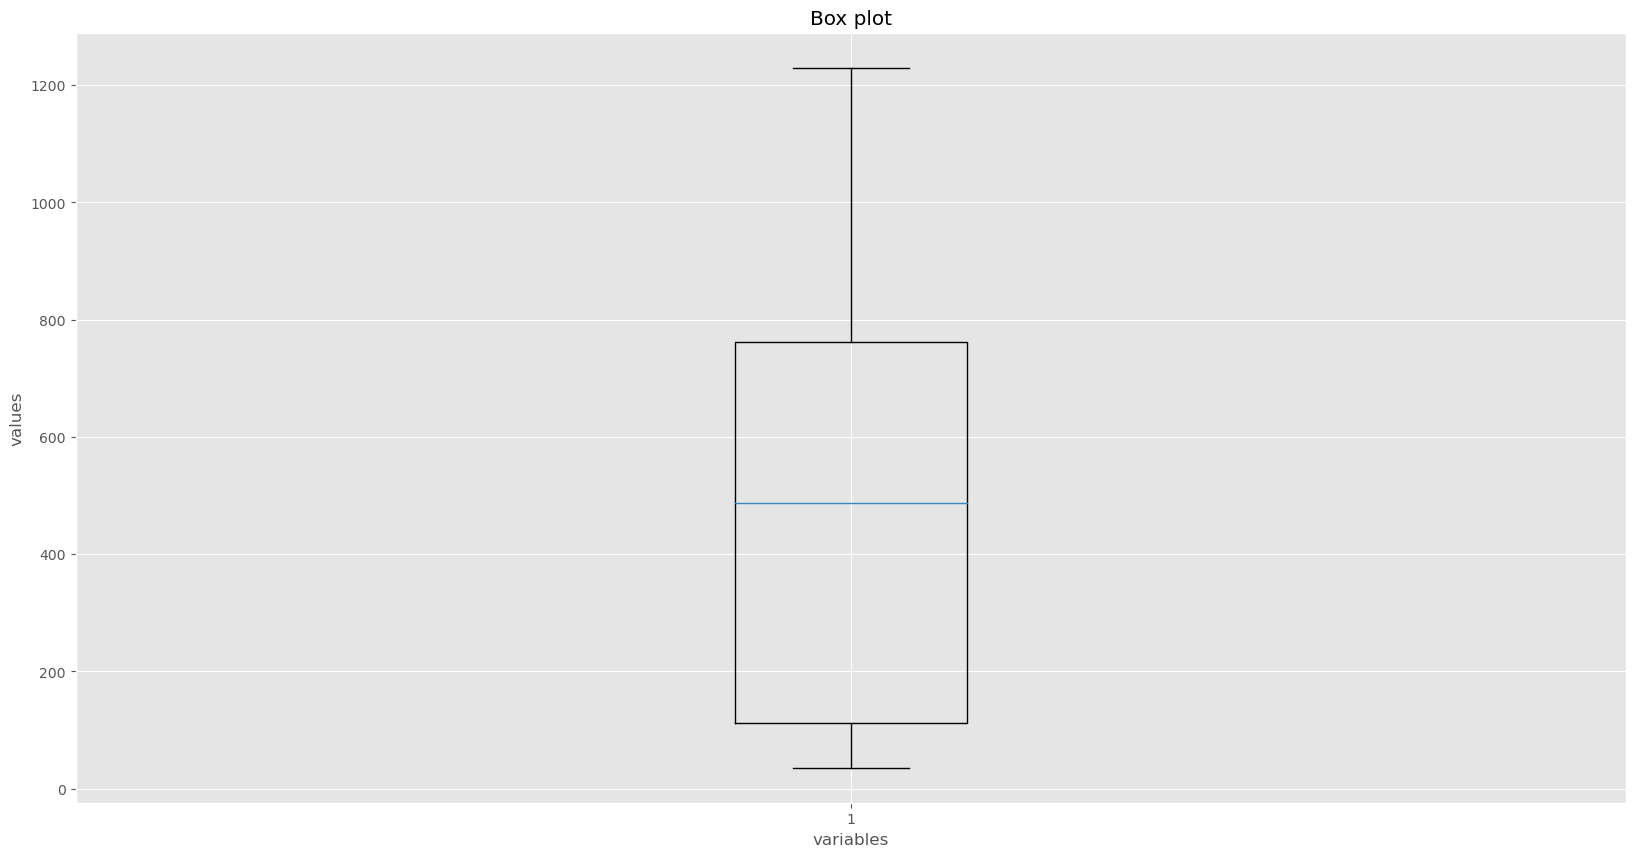

In [53]:
fig , ax = plt.subplots(figsize = (20,10))
# plot the box plot

ax.boxplot(stock_data['Close'])

# set the x-axis label

ax.set_xlabel('variables')

# set the y-axis label
ax.set_ylabel('values')

# set the title

ax.set_title('Box plot')

# show the plot
plt.show()

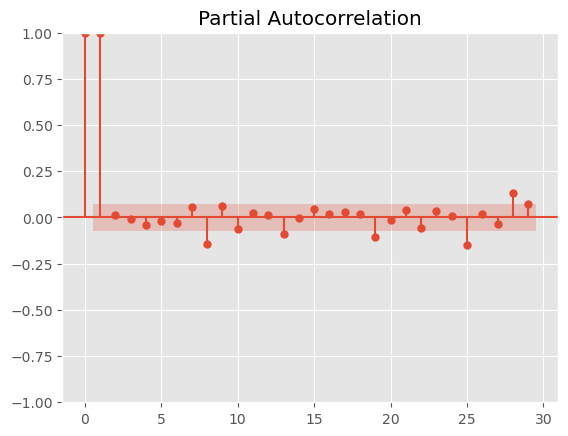

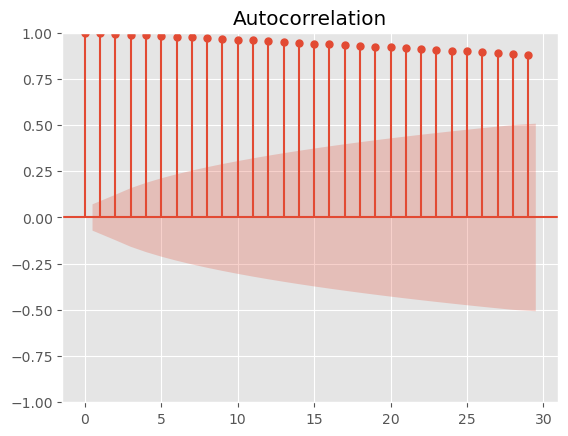

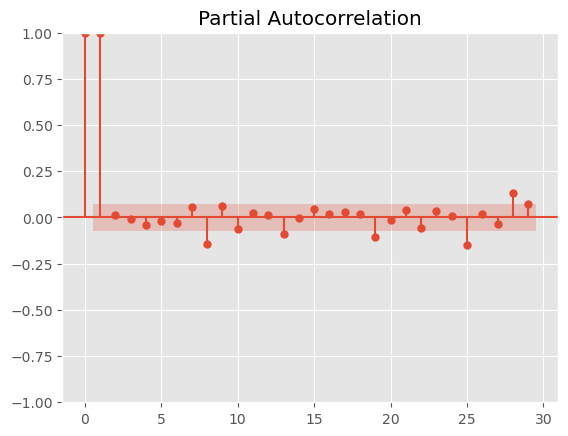

In [55]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

# Preprocessing of the data

1. fill the miss (here not required)
2. convert data into the stationary time series
3. if necessary then normalize the data (here not required)
4. split the data into train and test
5. clean the data by removing the outliers(here not required)

In [56]:
df_close = stock_data['Close']

In [57]:
tsla_close_diff1 = df_close.diff()

In [58]:
tsla_close_diff1

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [59]:
tsla_close_diff_1 = df_close.diff()

In [60]:
tsla_close_diff_1 = tsla_close_diff_1.dropna()

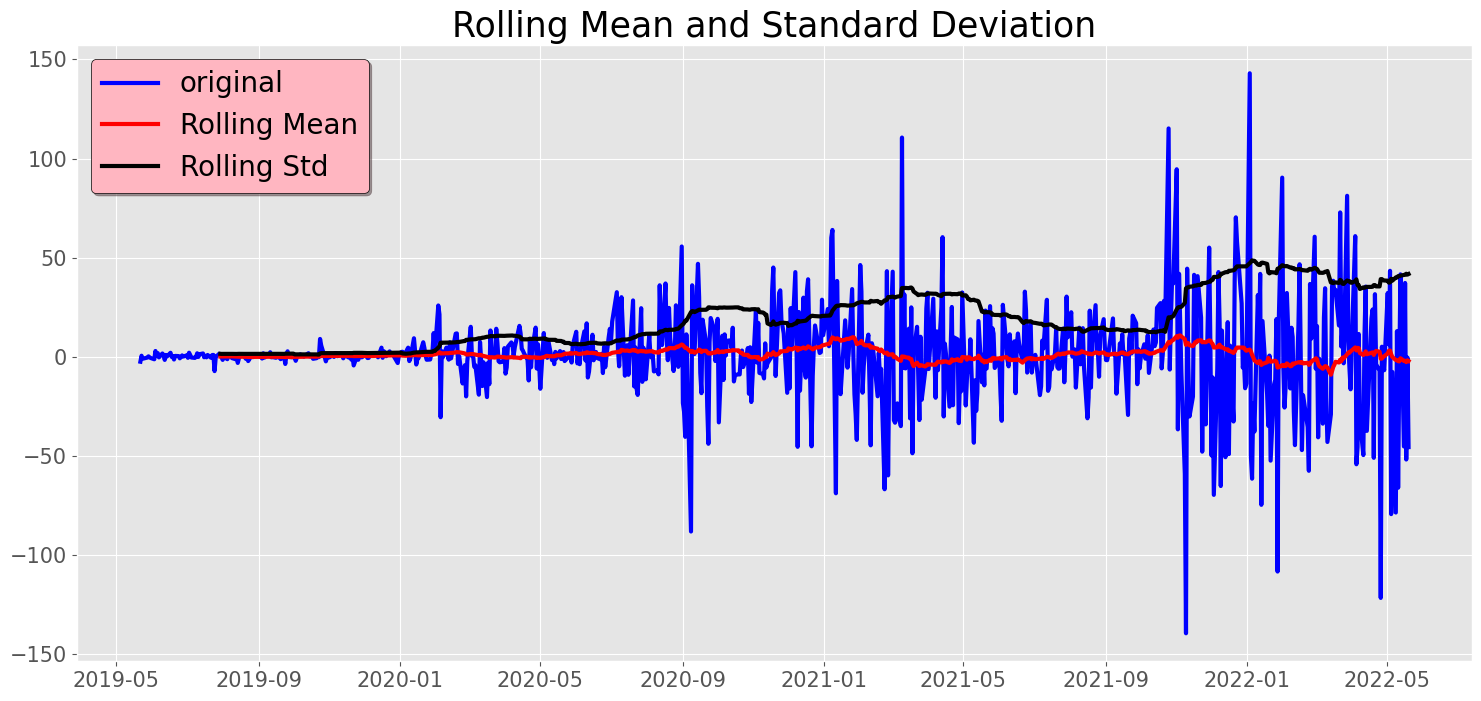

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of legs used               8.000000e+00
Number of observations used    7.480000e+02
critical value(1%)            -3.439123e+00
critical value(5%)            -2.865412e+00
critical value(10%)           -2.568832e+00
dtype: float64


In [61]:
test_stationarity(tsla_close_diff_1)

In [62]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

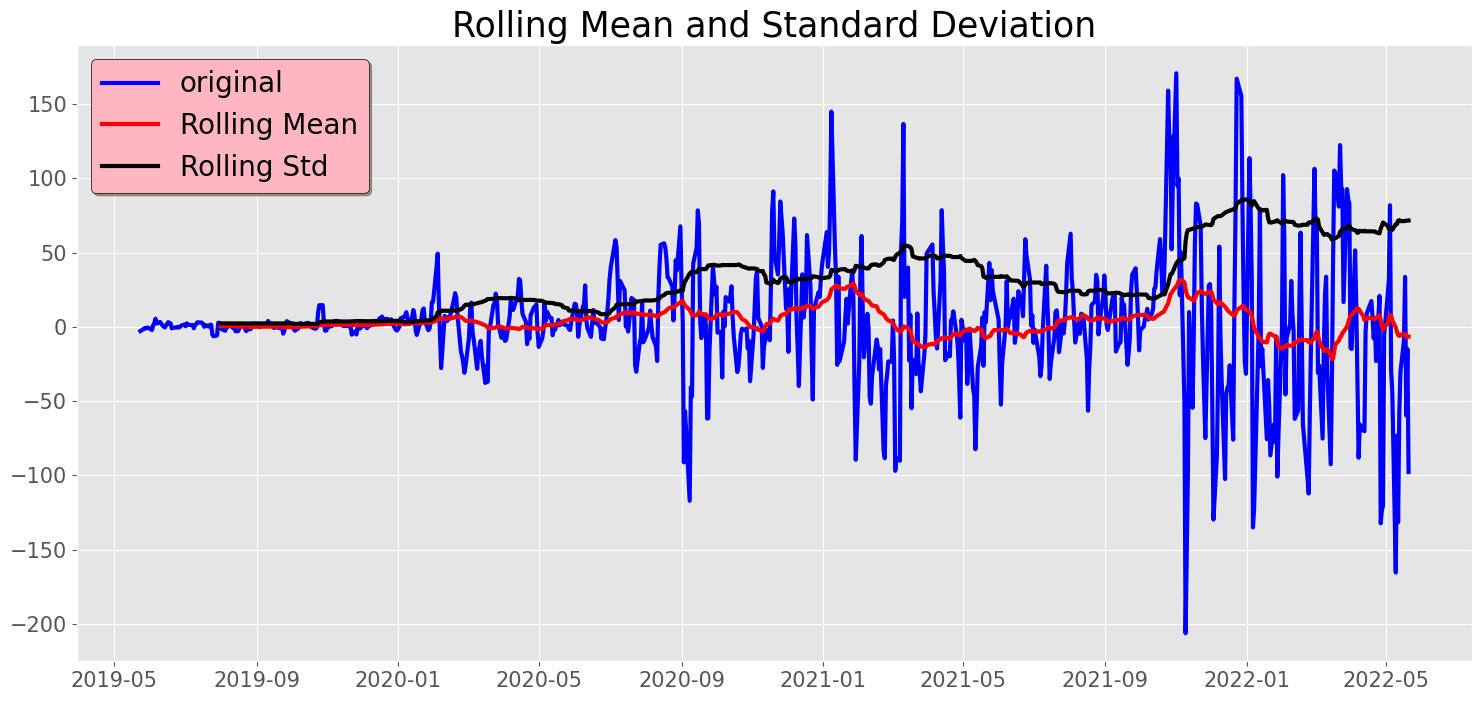

Results of dickey fuller test
Test Statistics               -5.697365e+00
p-value                        7.817959e-07
No. of legs used               1.900000e+01
Number of observations used    7.350000e+02
critical value(1%)            -3.439278e+00
critical value(5%)            -2.865480e+00
critical value(10%)           -2.568868e+00
dtype: float64


In [63]:
tsla_close_diff_3 = df_close.diff(3)
tsla_close_diff_3 = tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [64]:
# split data train and test

train_data = df_close[0:-60]
test_data = df_close[-60:]

In [65]:
train_data

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

In [66]:
test_data

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

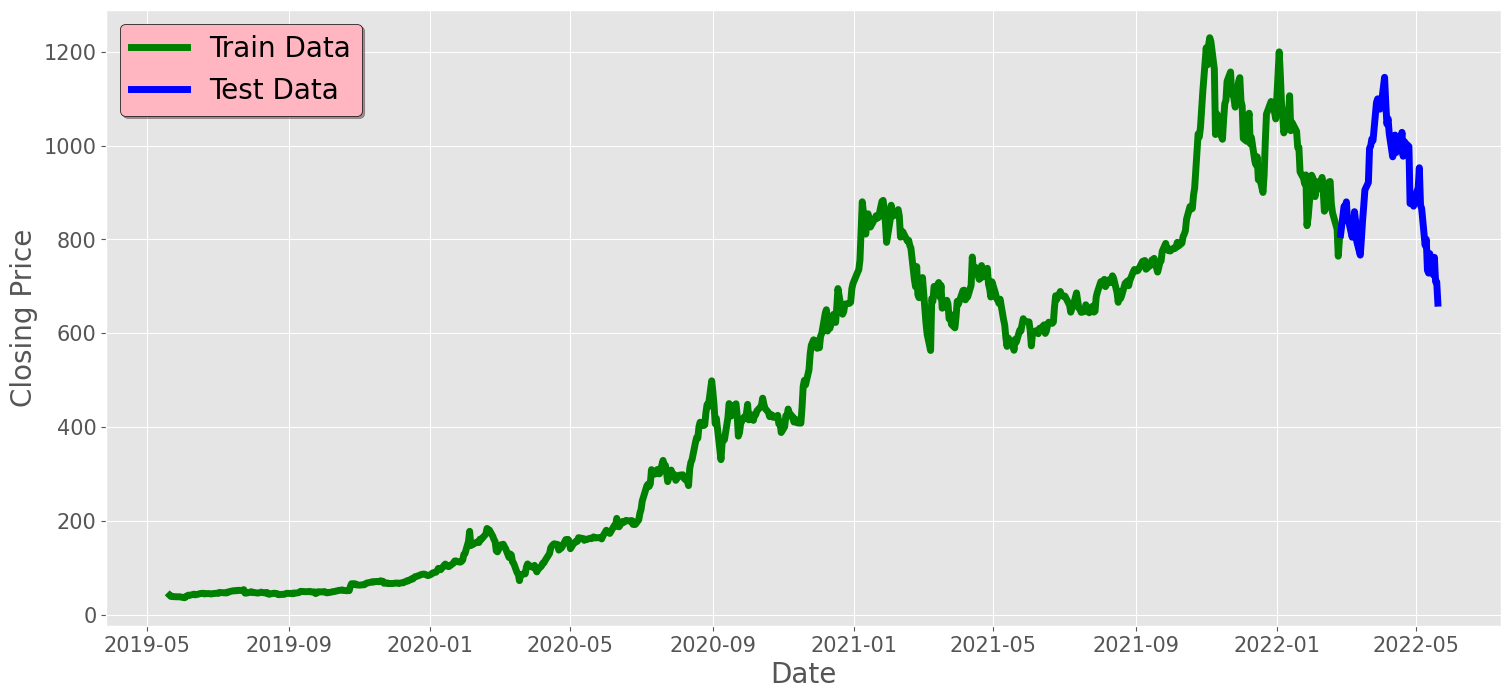

In [67]:
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Date' , fontsize=20)
plt.ylabel('Closing Price' , fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,color = 'green' , label = 'Train Data' , linewidth = 5)
plt.plot(test_data , color = 'blue' , label = 'Test Data' , linewidth = 5)
plt.legend(fontsize = 20 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [70]:
history = [x  for x in train_data]

In [71]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [72]:
model = ARIMA(history , order=(1,1,1))

In [73]:
model = model.fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 20 Jun 2023   AIC                           6306.700
Time:                        21:44:07   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
model.forecast()

array([800.20438283])

In [77]:
test_data[0]

809.8699951171875

In [80]:
def train_arima_model(x,y,arima_order):
    # prepare training dataser
    # make predictions list 
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history , order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
        
    # calculate out of sample error
    rmse = np.sqrt(mena_squared_error(y,predictions))
    return rmse

In [89]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA model

def evaluate_models(dataset , test,p_values ,d_values, q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf') , None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg = rmse,order
                    print('ARIMA %s RMSE =%.3f'  % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))

In [90]:
# evaluate parameters 
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data ,test_data ,p_values,p_values,q_values)

Best ARIMANone RMSE=inf


In [102]:
history = [x for x in train_data]
prediction = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,1,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    prediction.append(fc)
    #conf_list.append(conf)
    history.append(test_data[t])
print('RMSE of ARIMA Model: ' ,np.sqrt(mean_squared_error(test_data,prediction)))

RMSE of ARIMA Model:  39.47529826194644


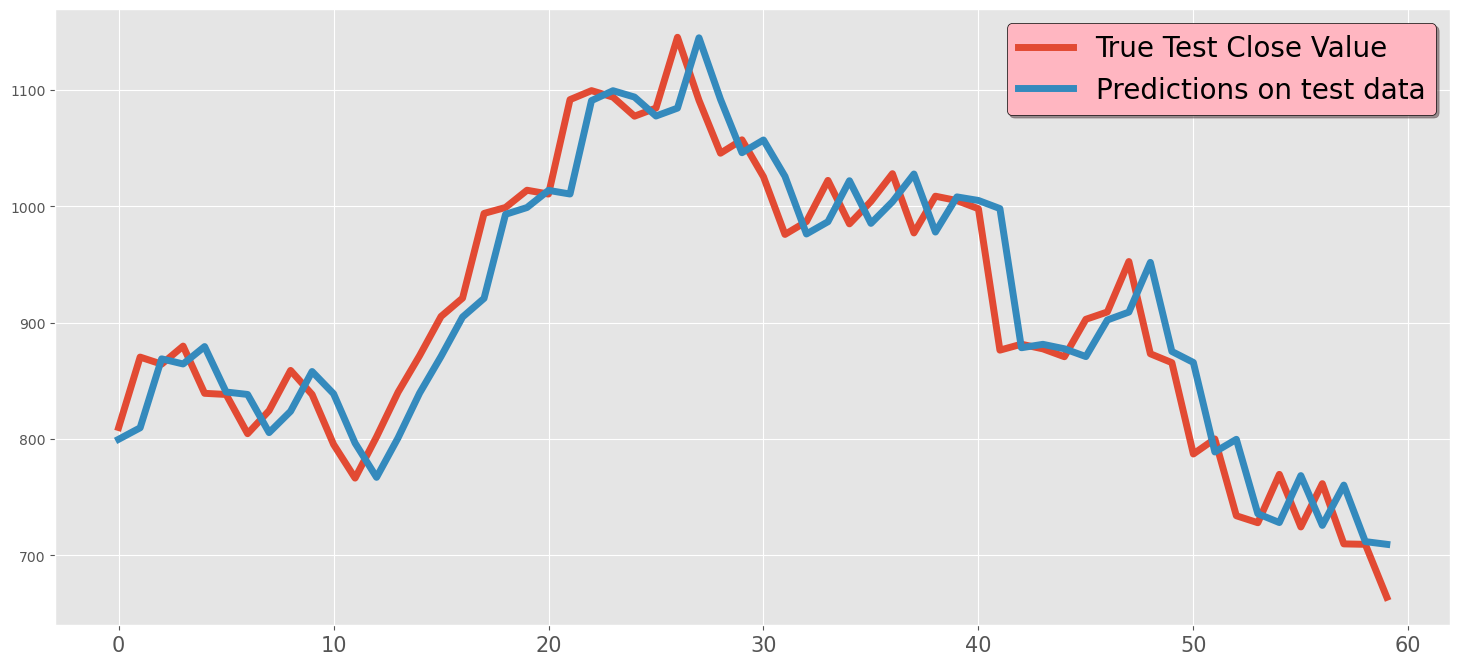

In [103]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)) , test_data , label = 'True Test Close Value' , linewidth = 5)
plt.plot(range(len(prediction)) , prediction , label = 'Predictions on test data' , linewidth =5)
plt.xticks(fontsize = 15)
plt.legend(fontsize=20,shadow = True ,facecolor = 'lightpink' , edgecolor = 'k')
plt.show()

In [106]:
import statsmodels.api as sm

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history,order=(0,1,0) , seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc = model_fit.forecast(alpha =0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:' ,np.sqrt(mean_squared_error(test_data,predictions)))
    

RMSE of ARIMA Model: 39.7394819956762


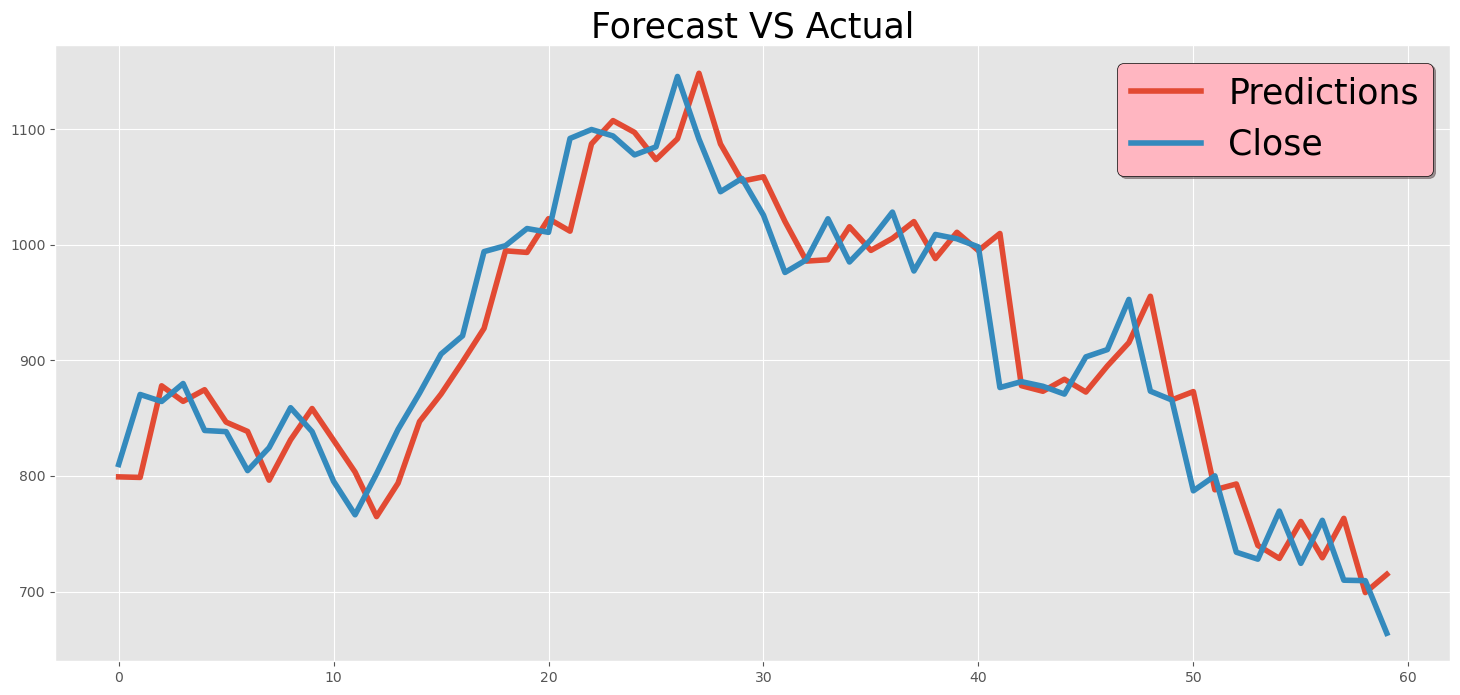

In [107]:
plt.figure(figsize=(18,8))
plt.title('Forecast VS Actual' , fontsize=25)
plt.plot(range(60),predictions ,label = 'Predictions' , linewidth = 4)
plt.plot(range(60) , test_data , label = 'Close' ,linewidth=4)
plt.legend(fontsize = 25 , shadow = True , facecolor = 'lightpink' , edgecolor = 'k')

In [108]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64